In [3]:
# importing packages
import pandas as pd
import numpy as np
import warnings 
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
warnings.filterwarnings('ignore')

train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:

data = pd.concat([train_data,test_data],axis=0)
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
print(f'Shape of Train data {train_data.shape}\nShape of Test data {test_data.shape}')

Shape of Train data (1296675, 23)
Shape of Test data (555719, 23)


In [11]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [12]:
legit_train_data = train_data[train_data['is_fraud']==0].sample(n=7506)
legit_train_data.shape

(7506, 23)

In [13]:
new_train_data = pd.concat([legit_train_data,train_data[train_data['is_fraud']==1]],axis=0)
new_train_data.value_counts()

Unnamed: 0  trans_date_trans_time  cc_num               merchant                             category        amt     first        last      gender  street                         city         state  zip    lat      long       city_pop  job                                    dob         trans_num                         unix_time   merch_lat  merch_long   is_fraud
350         2019-01-01 04:36:19    3593118134380341     fraud_Kutch LLC                      gas_transport   67.45   Laura        Casey     F       6114 Moran Way                 Steuben      ME     4680   44.4971  -67.9503   1131      Make                                   1959-05-10  37b9b0f36bc38d0bab47a73a94dcf99a  1325392579  44.384263  -68.523008   0           1
876904      2019-12-21 18:55:13    60490596305          fraud_Skiles LLC                     home            1.30    Karen        Johnson   F       4349 Anna Flat Suite 214       Haynes       AR     72341  34.8838  -90.7666   222       Programmer, applications   

# Encoding all the data into numerical values

In [14]:
encoder = LabelEncoder()
label_encoder = {}

req_cols = data.select_dtypes(include=['object']).columns

for col in req_cols:
    new_train_data[col] = encoder.fit_transform(new_train_data[col].astype('str'))
    label_encoder[col] = encoder
    
    test_data[col] = encoder.fit_transform(test_data[col])
    label_encoder[col] = encoder
    
    data[col] = encoder.fit_transform(data[col])
    label_encoder[col] = encoder

In [15]:
new_train_data.groupby('is_fraud').mean()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,654663.800293,7673.485612,4.274358e+17,339.743672,6.195044,72.887054,180.095657,245.805356,0.448042,482.562217,...,48930.135225,38.405096,-90.199736,96140.581268,250.930989,536.142952,7428.990541,1.349467e+09,38.404924,-90.204291
1,624949.724354,7333.810951,4.003577e+17,341.446043,7.264055,531.320092,176.147882,248.398348,0.502398,490.906342,...,48038.714229,38.663609,-89.916041,97276.763256,250.241940,489.232481,7582.009459,1.348389e+09,38.653901,-89.915808


In [16]:
X_train = new_train_data.drop(columns='is_fraud',axis=1)
Y_train = new_train_data['is_fraud']

X_test = test_data.drop(columns='is_fraud',axis=1)
Y_test = test_data['is_fraud']

In [17]:
model = RandomForestClassifier(random_state=2)

model.fit(X_train,Y_train)

RandomForestClassifier(random_state=2)

In [18]:
Y_pred=model.predict(X_test)

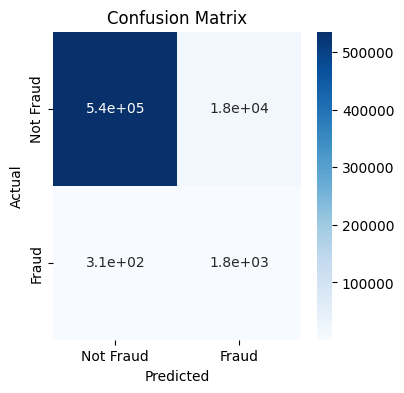

In [19]:
labels = ['Not Fraud','Fraud']

cm=confusion_matrix(Y_test,Y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
print(f'Accuracy Score {accuracy_score(Y_test,Y_pred)}')

Accuracy Score 0.9675285530996781


In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.09      0.85      0.17      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.91      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [22]:
import pickle
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
    # Load the model from the file
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use loaded_model to make predictions
Y_pred_loaded = loaded_model.predict(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)


In [27]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(sc, file)

print("Scaler saved successfully as 'scaler.pkl'")

Scaler saved successfully as 'scaler.pkl'
